## IMPORTING THE DATA THROUGHT THE SQL COMMAND

In [ ]:
go to cmd  

go to bin  path

cd "C:\Program Files\MySQL\MySQL Server 8.0\bin"

mysql -u root -p
password = 12345

set GLOBAL local_infile = 1 ; 
quit ; 

mysql --local-infile = 1 -u root -p
ENTER PASSWORD = 12345

SHOW DATABSES 

CREATE DATABASES IF NOT EXIST   ## VERY IMPORTANT

USE credit_card(database name)



LOAD DATA LOCAL INFILE 'E:\\Jupyter_Project\\credit_card.csv'    ## give path where csv file is stored
INTO TABLE credit                                                 ## give the existing table name
FIELDS TERMINATED BY ','
ENCLOSED BY '"'
LINES TERMINATED BY '\r\n' IGNORE 1 ROWS;

In [ ]:
## creating table for credit

CREATE TABLE credit(
   Time   INT            ,
   V1   FLOAT,
   V2   double              ,
   V3   double              ,
   V4   double             ,
   V5   double              ,
   V6   double              ,
   V7   double             ,
   V8   double              ,
   V9   double              ,
   V10   double             ,
   V11   double             ,
   V12  double             ,
   V13  double             ,
   V14   double              ,
   V15   double              ,
   V16   double              ,
   V17   double              ,
   V18  double              ,
   V19   double              ,
   V20   double              ,
   V21   double              ,
   V22  double             ,
   V23   double              ,
   V24   double             ,
   V25   double              ,
   V26   double              ,
   V27   double              ,
   V28  double              ,
   Amount   FLOAT             ,
   Class  INT  


   );

### AGGREGATED FUNCTION : - a whole formed by combining several separate elements.


##### aggregate  function contains groupby count min max , sum avg

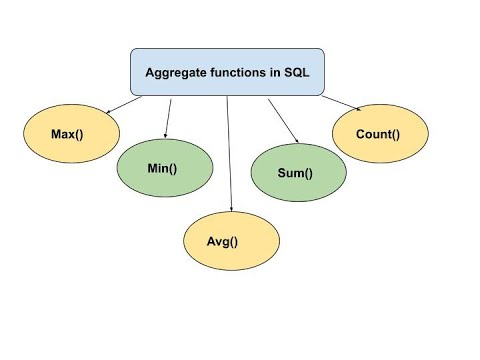

In [2]:
## COUNT AND PERCENTAGE 
1)  SELECT COUNT(*) FROM CREDIT_CARD


2)  SELECT COUNT(*) , class FROM  credit_card
     group by Class   ## ONLY COUNT 
    
    
3)  SELECT Class, COUNT(*) AS COUNT, COUNT(*)* 100.0/ SUM(COUNT(*)) OVER () AS Class_PERCENTAGE
     FROM credit_card
     GROUP BY Class
     ORDER BY 2 DESC;   ## COUNT AS WELL AS PERCENTAGE 
    
    
4)  SELECT   DISTINCT(PATIENT_ID) , PLAN_TYPE,COUNT(*), COUNT(*)* 100.0/ sum(count(*))
     over () as PLAN_TYPE_PERCENTAGE_SX_TABLE
     FROM ALTH_SX_
     GROUP BY PLAN_TYPE
     ORDER BY 2 DESC;   ### BY TAKING THE DISTINCT PATIENT  COUNT THE PLAN TYPE 
        
        
5)   select count(distinct ALTH_PATIENT.PATIENT_ID)as Distinct_patient, COUNT(ALTH_PATIENT.PATIENT_ID)
       as PATIENT_ID
       from ALTH_PATIENT; ### DISTINCT PATIENT COUNT AND PATIENT COUNT 
        
        
6)      SELECT PLAN_TYPE, COUNT(DISTINCT PATIENT_ID, PLAN_TYPE) AS PLAN_COUNT , 
          COUNT(DISTINCT PATIENT_ID, PLAN_TYPE)*100.0/SUM(COUNT(DISTINCT PATIENT_ID, PLAN_TYPE)) OVER () AS PLAN_TYPE_PERCENTAGE
          FROM ALTH_PX_201904
          GROUP BY PLAN_TYPE
          ORDER BY 2 DESC;  ###  By taking the unique patient_id count the plan_type
        

7)      SELECT PATIENT_STATE, PATIENT_ZIP2  , COUNT(*) FROM ALTH_PATIENT
            group by PATIENT_STATE, PATIENT_ZIP2 ORDER BY PATIENT_STATE ASC  ### ON THE BASIS OF THE STATE AND THE PATIENT_ZIP2
                                                                            ## COUNT OPERATION 
        

8)      SELECT COUNT(ALTH_PATIENT.PATIENT_ID) FROM ALTH_PATIENT WHERE GENDER  = 'MALE'
            ### COUNT OPERATION FOR THE MALE
    


9)      SELECT SUM(TOTAL_CHARGES) FROM ALTH_PATIENTS  ## SUM OPERATION



10)     SELECT ROUND(SUM(TOTAL_CHARGES), 2) FROM ALTH_PATIENTS   ## SUM OPERATION USING ROUND FUNCTION



11)     SELECT MIN(TOTAL_CHARGES) FROM ALTH_PATIENTS   ## MIN OPERATION 



12)     SELECT MAX(TOTAL_CHARGES) FROM ALTH_PATIENTS



13)      SELECT AVG(TOTAL_CHARGES) FROM ALTH_PATIENTS


## PATIENT AGE DISTRIBUTION  IN FORM OF BIN    COUNT AND PERCENTAGE WISE

In [ ]:
###  PATIENT AGE DISTRIBUTION   : -

SELECT '0-20' PATIENT_BIRTH_YEAR, COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 0 AND 20 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END) Total



 ,COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 0 AND 20 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END)*100/sum(count(2022 - PATIENT_BIRTH_YEAR)) over () as Percentage
                                                                                         



from ALTH_PATIENT
union
SELECT '21-40' PATIENT_BIRTH_YEAR, COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 21 AND 40 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END) Total



 ,COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 21 AND 40 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END)*100/sum(count(2022 - PATIENT_BIRTH_YEAR)) over () as Percentage
                                                                                         



from ALTH_PATIENT

union
SELECT '41-60' PATIENT_BIRTH_YEAR, COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 41 AND 60 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END) Total



 ,COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 41 AND 60 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END)*100/sum(count(2022 - PATIENT_BIRTH_YEAR)) over () as Percentage
                                                                                         



from ALTH_PATIENT

union
SELECT '61-80' PATIENT_BIRTH_YEAR, COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 61 AND 80 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END) Total



 ,COUNT(CASE WHEN 2022 - PATIENT_BIRTH_YEAR BETWEEN 61 AND 80 THEN 2022 - PATIENT_BIRTH_YEAR ELSE NULL END)*100/sum(count(2022 - PATIENT_BIRTH_YEAR)) over () as Percentage
                                                                                         



from ALTH_PATIENT

### IN FORM OF BIN COUNT AND PERCENTAGE

## ORDER BY HAVING AND THE LIMIT CAUSE : -

https://bipp.io/sql-tutorial/basic-sql/sql-order-by-limit-clauses/

In [ ]:
1)   SELECT Time , COUNT(*)  AS CNT FROM credit_card where CNT>2
        GROUP BY Time
    
    NOTE  : - IN WHERE CLAUSE IS ONLY APPLICABLE FOR THE  EXISTING COLUMNS i.e COLUMNS WHICH WE ARE USING HAS TO BE A PART OF 
         ORIGINAL TABLES 
            
            
            WHICH MEANS WHERE CLAUSE , GROUPING ACTIVITIES , ARE NOT POSSIBLE ON THE GROUPBY OPERATION
            
            
    NOTE : - TO OVERCOME THIS PROBLEM WE USE HAVING CLAUSE 
        
        
        The HAVING clause was added to SQL because the WHERE keyword cannot be used with aggregate
        functions.

##  HAVING  FUNCTION IN MY - SQL

1) W3_SCHOOOL :-  https://www.w3schools.com/sql/sql_having.asp

2) TUTORIAL POINT :-  https://www.tutorialspoint.com/sql/sql-having-clause.htm

In [ ]:
1)  SELECT Time , COUNT(*)  AS CNT FROM credit_card
      GROUP BY Time    HAVING CNT>3  ## HAVING CLAUSE FOR AGGREGATED AND GROUPBY FUNCTION :- 
    

    
2)   SELECT Time , COUNT(*)  AS CNT FROM credit_card
      GROUP BY Time    HAVING CNT>3 ORDER BY Time ASC LIMIT 10F

### STRING FUNCTION IN SQL : -

1)   https://www.w3schools.com/sql/sql_ref_sqlserver.asp

2)   https://www.geeksforgeeks.org/sql-string-functions/

In [ ]:
1) SELECT CONCAT("RAHUL" , " ","SINGH") AS MY_NAME

### DATE TIME FUNCTIONS : -

1 )   https://www.w3schools.com/sql/sql_dates.asp
2 )   https://www.programiz.com/sql/date-time
3 )   https://www.w3schools.com/sql/func_sqlserver_getdate.asp
4 )   https://popsql.com/learn-sql/sql-server/how-to-query-date-and-time-in-sql-server

In [ ]:
1)   ###DATE DIFFRENCE  FUNCTION

         SELECT DATEDIFF(SYSDATE() , SERVICE_DATE) AS DATE_DIFFRENCE FROM ALTH_DX_201905

2)  ###SELECTING THE DATE , MONTH, YEAR 
         SELECT DAY(SERVICE_DATE)AS DAY , ALTH_DX_201905.* FROM ALTH_DX_201905
         SELECT QUARTER(SERVICE_DATE)AS QUARTER , ALTH_DX_201905.* FROM ALTH_DX_201905

3)  ###INTERVAL  OF  DATE
         SELECT SUBDATE('2017-05-15' , INTERVAL 2 DAY) ,  ADDDATE('2017-05-15' , INTERVAL 2 DAY)
    




### REGEX OPERATION IN SQL  : -

1) https://www.geeksforgeeks.org/mysql-regular-expressions-regexp/#:~:text=REGEXP%20is%20the%20operator%20used,used%20as%20an%20escape%20character.

2) https://dataschool.com/how-to-teach-people-sql/how-regex-works-in-sql/

3) https://learn.microsoft.com/en-us/sql/ssms/scripting/search-text-with-regular-expressions?view=sql-server-ver16

### NESTED QUERY  : -

1) https://www.tutorialspoint.com/sql/sql-sub-queries.htm

2) https://learnsql.com/blog/sql-nested-select/

3) https://www.tutorialrepublic.com/sql-tutorial/sql-subqueries.php

In [ ]:
1 )  SELECT * FROM credit_card WHERE Time < (SELECT AVG(Time) FROM credit_card) 
                    ### SELECT ID WHERE IT IS GREATER THAN AVERAGE  : -

2 )  SELECT COUNT(*) FROM credit_card   WHERE Time < (SELECT Time FROM  credit_card WHERE Class = 0 )


3 )    select * FROM credit_card 
         WHERE  Amount = (select max(Amount)   from   credit_card) ;
    ## SELECT THAT ID WHICH CONTAINS MAX AMOUNT : -

### VIEWS 

1)  https://www.w3schools.com/sql/sql_view.asp
2)  https://www.geeksforgeeks.org/sql-views/

In [ ]:
1)    CREATE VIEW  ZERO AS  
            SELECT * FROM  credit_card where Time = 0
            SELECT * FROM  ZERO

### STORED PROCEDURE : -

1) https://www.geeksforgeeks.org/sql-views/

2) https://www.simplilearn.com/tutorials/sql-tutorial/stored-procedure-in-sql

3) https://www.programiz.com/sql/stored-procedures

In [ ]:
1